# load data

In [4]:
import pandas as pd

m6A_plus_protAA_file = "0_all_m6A_plus_protAA_with_log2OR.csv"
m6A_minus_protAA_file = "0_all_m6A_minus_protAA_with_log2OR.csv"
m6A_unknown_protAA_file = "0_all_m6A_unknown_protAA_with_log2OR.csv"

m6A_plus_protAA_df = pd.read_csv(m6A_plus_protAA_file, sep="\t", header=0, index_col=0)
m6A_minus_protAA_df = pd.read_csv(m6A_minus_protAA_file, sep="\t", header=0, index_col=0)
m6A_unknown_protAA_df = pd.read_csv(m6A_unknown_protAA_file, sep="\t", header=0, index_col=0)
print("m6A_plus:", m6A_plus_protAA_df.shape)
print("m6A_minus:", m6A_minus_protAA_df.shape)
print("m6A_unknown:", m6A_unknown_protAA_df.shape)


m6A_plus: (54, 3)
m6A_minus: (263, 3)
m6A_unknown: (34, 3)


In [5]:
m6A_plus_protAA_df.head()

,AA_seqStr,avg_log2OR,flag
protein_id,,,
4-ACO1-2|RBD|145|1.57|2.30,AGNIARNSPAARYLTNRGLTPREFNSYGSRRGNDAVMARGTFANIR...,0.925521,m6A_plus
16-BOLL|Full|283|3.22|3.84,MQTDSLSPSPNPVSPVPLNNPTSAPRYGTVIPNRIFVGGIDFKTNE...,1.815286,m6A_plus
19-CIRBP|Full|172|2.67|2.42,MASDEGKLFVGGLSFDTNEQSLEQVFSKYGQISEVVVVKDRETQRS...,1.347180,m6A_plus
20-CNOT4-1|RBD|114|3.67|2.43,QKISENRKHLASVRVVQKNLVFVVGLSQRLADPEVLKRPEYFGKFG...,1.577455,m6A_plus
22-CNOT4-3|RBD|213|1.99|1.97,MSRSPDAKEDPVECPLCMEPLEIDDINFFPCTCGYQICRFCWHRIR...,0.986503,m6A_plus


In [6]:
m6A_minus_protAA_df.head()

,AA_seqStr,avg_log2OR,flag
protein_id,,,
1-ACIN1-1|RBD|112|0.49|0.37,SITIDDPVRTAQVPSPPRGKISNIVHISNLVRPFTLGQLKELLGRT...,-1.217478,m6A_minus
2-ACIN1-2|RBD|60|0.36|0.08,AELEEVTLDGKPLQALRVTDLKAALEQRGLAKSGQKSALVKRLKGA...,-2.541234,m6A_minus
3-ACO1-1|RBD|527|0.87|0.81,IRNCDEFLVKKQDIENILHWNVTQHKNIEVPFKPARVILQDFTGVP...,-0.254216,m6A_minus
5-ACO1-3|RBD|880|0.54|0.06,EPLDPVQPGKKFFNLNKLEDSRYGRLPFSIRVLLEAAIRNCDEFLV...,-2.472050,m6A_minus
6-AKAP1-2|RBD|124|0.16|0.18,CCSLKKTESFQNAQAGSNPKKVDLIIWEIEVPKHLVGRLIGKQGRY...,-2.578099,m6A_minus


In [7]:
m6A_unknown_protAA_df.head()

,AA_seqStr,avg_log2OR,flag
protein_id,,,
11-ANKRD17|RBD|103|1.23|0.99,NGKLTVASPKRGQKREEGWKEVVRRSKKVSVPSTVISRVIGRGGCN...,0.141349,unknown
12-APTX|Full|168|1.13|0.98,MQDPKMQVYKDEQVVVIKDKYPKARYHWLVLPWTSISSLKAVAREH...,0.071769,unknown
31-DND1-1|Full|354|0.36|1.12,MQSKRDCELWCERVNPENKAALEAWVRETGIRLVQVNGQRKYGGPP...,-0.650358,unknown
40-EIF4H|Full|228|1.60|0.90,MADFDTYDDRAYSSFGGGRGSRGSAGGHGSRSQKELPTEPPYTAYV...,0.262379,unknown
42-ENOX1|Full|643|1.24|0.60,MVDAGGVENITQLPQELPQMMAAAADGLGSIAIDTTQLNMSVTDPT...,-0.217077,unknown


# one-hot encoding and test

In [ ]:
# set AA sliding window size and step length
aa_seq_ouput_len = 300
stride_len = 30

In [ ]:
import numpy as np
from keras.utils import to_categorical
# Define a function for encoding amino acid sequences using one-hot encoding and test it.
def one_hot_encode(sequence, max_length=aa_seq_ouput_len):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    encoded = to_categorical([amino_acids.index(aa) for aa in sequence], num_classes=len(amino_acids), dtype="int")
    if len(encoded) < max_length:
        encoded = np.pad(encoded, ((0, max_length - len(encoded)), (0, 0)), 'constant')
    return encoded


In [11]:
seq1 = m6A_minus_protAA_df["AA_seqStr"][1]
print(len(seq1),": ", seq1)
seq1_onehot = one_hot_encode(seq1, aa_seq_ouput_len)
print(seq1_onehot.shape)
seq1_onehot

60 :  AELEEVTLDGKPLQALRVTDLKAALEQRGLAKSGQKSALVKRLKGALMLENLQKHSTPHA
(300, 20)


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import pandas as pd
def process_csv(file_path, out_seq_len=aa_seq_ouput_len, step_size=stride_len):
    df = pd.read_csv(file_path, sep="\t")
    new_protein_ids = []
    new_sequences = []
    new_scores = []
    pro_flags = []
    for index, row in df.iterrows():
        protein_id = row['protein_id']
        sequence = row['AA_seqStr']
        score = row['avg_log2OR']
        pro_flag = row['flag']
        #
        if len(sequence) > out_seq_len:
            for i in range(0, len(sequence)-out_seq_len+1, step_size):
                subseq = sequence[i:i+out_seq_len]
                new_protein_ids.append(protein_id)
                new_sequences.append(subseq)
                new_scores.append(score)
                pro_flags.append(pro_flag)
            #
            if (len(sequence)-out_seq_len) % step_size != 0:
                subseq = sequence[len(sequence)-out_seq_len:]
                new_protein_ids.append(protein_id)
                new_sequences.append(subseq)
                new_scores.append(score)
                pro_flags.append(pro_flag)
        else:
            new_protein_ids.append(protein_id)
            new_sequences.append(sequence)
            new_scores.append(score)
            pro_flags.append(pro_flag)
    #
    encoded_sequences = [one_hot_encode(aa_seq, out_seq_len) for aa_seq in new_sequences]
    processed_df = pd.DataFrame({
        'protein_id': new_protein_ids,
        'encoded_AAstr': encoded_sequences,
        'avg_log2OR': new_scores,
        'flag': pro_flags
    })
    return processed_df


In [ ]:
# View the shape of the training data before preprocessing
print("m6A_plus:", m6A_plus_protAA_df.shape)
print("m6A_minus:", m6A_minus_protAA_df.shape)
print("m6A_unknown:", m6A_unknown_protAA_df.shape)


m6A_plus: (54, 3)
m6A_minus: (263, 3)
m6A_unknown: (34, 3)


# Read in the data and perform preprocessing

In [ ]:
m6A_plus_protAA_file = "0_all_m6A_plus_protAA_with_log2OR.csv"
m6A_minus_protAA_file = "0_all_m6A_minus_protAA_with_log2OR.csv"
m6A_unknown_protAA_file = "0_all_m6A_unknown_protAA_with_log2OR.csv"
m6A_plus_processed_df = process_csv(m6A_plus_protAA_file, out_seq_len=aa_seq_ouput_len, step_size=stride_len)
m6A_minus_processed_df = process_csv(m6A_minus_protAA_file, out_seq_len=aa_seq_ouput_len, step_size=stride_len)
m6A_unknown_processed_df = process_csv(m6A_unknown_protAA_file, out_seq_len=aa_seq_ouput_len, step_size=stride_len)
print("m6A_plus:", m6A_plus_processed_df.shape)
print("m6A_minus:", m6A_minus_processed_df.shape)
print("m6A_unknown:", m6A_unknown_processed_df.shape)


m6A_plus: (311, 4)
m6A_minus: (942, 4)
m6A_unknown: (173, 4)


In [16]:
m6A_plus_processed_df.head()

,protein_id,encoded_AAstr,avg_log2OR,flag
0,4-ACO1-2|RBD|145|1.57|2.30,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.925521,m6A_plus
1,16-BOLL|Full|283|3.22|3.84,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",1.815286,m6A_plus
2,19-CIRBP|Full|172|2.67|2.42,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",1.347180,m6A_plus
3,20-CNOT4-1|RBD|114|3.67|2.43,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1.577455,m6A_plus
4,22-CNOT4-3|RBD|213|1.99|1.97,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",0.986503,m6A_plus


In [17]:
m6A_plus_processed_df.encoded_AAstr[0].shape

(300, 20)

# Construct training and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
# training dataset: 70%,  test dataset: 30%
m6A_plus_train_df, m6A_plus_val_df = train_test_split(m6A_plus_processed_df, test_size=0.3, random_state=123)
m6A_minus_train_df, m6A_minus_val_df = train_test_split(m6A_minus_processed_df, test_size=0.3, random_state=123)
m6A_unknown_train_df, m6A_unknown_val_df = train_test_split(m6A_unknown_processed_df, test_size=0.3, random_state=123)
total_train_df = pd.concat([m6A_plus_train_df, m6A_minus_train_df, m6A_unknown_train_df])
total_val_df = pd.concat([m6A_plus_val_df, m6A_minus_val_df, m6A_unknown_val_df])

# Extract features and labels
X_train =  np.array(total_train_df['encoded_AAstr'].tolist())
y_train = total_train_df['avg_log2OR'].values
X_val =  np.array(total_val_df['encoded_AAstr'].tolist())
y_val = total_val_df['avg_log2OR'].values


In [41]:
print(m6A_plus_train_df.shape, m6A_plus_val_df.shape)
print(m6A_minus_train_df.shape, m6A_minus_val_df.shape)
print(m6A_unknown_train_df.shape, m6A_unknown_val_df.shape)

(217, 4) (94, 4)
(659, 4) (283, 4)
(121, 4) (52, 4)


In [42]:
print(total_train_df.shape, total_val_df.shape)

(997, 4) (429, 4)


In [43]:
total_train_df.head()

,protein_id,encoded_AAstr,avg_log2OR,flag
125,171-RBM19|Full|960|1.82|1.62,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.781632,m6A_plus
271,SND1|Full|910|1.82|2.03,"[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.942429,m6A_plus
204,IGF2BP1|Full|577|2.49|2.56,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1.336033,m6A_plus
195,318-YTHDF2|Full|579|1.60|1.99,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.833136,m6A_plus
85,164-RBM12|Full|932|2.89|1.24,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...",0.921960,m6A_plus


In [44]:
total_val_df.head()

,protein_id,encoded_AAstr,avg_log2OR,flag
241,YTHDF3|Full|585|5.45|6.84,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",2.609134,m6A_plus
29,68-HNRNPK|Full|463|11.00|3.35,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2.602782,m6A_plus
270,SND1|Full|910|1.82|2.03,"[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.942429,m6A_plus
79,164-RBM12|Full|932|2.89|1.24,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",0.921960,m6A_plus
211,IGF2BP2|Full|599|14.38|10.50,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",3.619317,m6A_plus


In [46]:
print(X_train.ndim, y_train.ndim)
print(X_val.ndim, y_val.ndim)

3 1
3 1


In [48]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(997, 300, 20) (997,)
(429, 300, 20) (429,)


# Training and testing the CNN model

In [51]:
import random
random.seed(1234)
import numpy as np
import pandas as pd

import tensorflow as tf
import keras.layers as kl

from keras.models import Sequential, Model
from keras.layers import Input, InputLayer, BatchNormalization
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.core import Dropout, Reshape, Dense, Activation, Flatten
from keras.callbacks import EarlyStopping, History, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


In [ ]:
## Additional metrics
from scipy.stats import spearmanr
def tf_Spearman(y_true, y_pred):
    return ( tf.py_function(spearmanr, [tf.cast(y_pred, tf.float32), tf.cast(y_true, tf.float32)], Tout = tf.float32) )


In [ ]:
model_params = {'lr': 0.002,
            'n_conv_layer': 5,
            'num_filters1': 512,
            'num_filters2': 256,
            'num_filters3': 128,
            'num_filters4': 128,
            'num_filters5': 256,
            'kernel_size1': 15,
            'kernel_size2': 9,
            'kernel_size3': 7,
            'kernel_size4': 5,
            'kernel_size5': 3,
            'n_add_layer': 3,
            'dense_neurons1': 512,
            'dense_neurons2': 256,
            'dense_neurons3': 256,
            'dropout_prob': 0.4,
            'pad': 'same'}

def DeepPScan(params, encoded_AAstr_len):
    input = Input(shape=(encoded_AAstr_len, 20))
    x = Conv1D(params['num_filters1'], kernel_size=params['kernel_size1'], padding=params['pad'], name='Conv1D_1')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(3)(x)
    for i in range(1, params['n_conv_layer']):
        x = Conv1D(params['num_filters'+str(i+1)],
                        kernel_size=params['kernel_size'+str(i+1)],
                        padding=params['pad'],
                        name=str('Conv1D_'+str(i+1)))(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling1D(2)(x)
    #
    x = Flatten()(x)
    # dense layers
    for i in range(0, params['n_add_layer']):
        x = Dense(params['dense_neurons'+str(i+1)], name=str('Dense_'+str(i+1)))(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Dropout(params['dropout_prob'])(x)
    bottleneck = x
    # 
    outputs = Dense(1, activation='linear', name=str('m6A_log2OR'))(bottleneck)
    model = Model(input, outputs)
    model.compile(Adam(learning_rate=params['lr']), loss='mse', metrics=[tf_Spearman])
    return model


In [ ]:
my_model = DeepPScan(model_params, aa_seq_ouput_len)
my_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 20)]         0         
_________________________________________________________________
Conv1D_1 (Conv1D)            (None, 300, 512)          154112    
_________________________________________________________________
batch_normalization_8 (Batch (None, 300, 512)          2048      
_________________________________________________________________
activation_8 (Activation)    (None, 300, 512)          0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 100, 512)          0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 100, 256)          1179904   
_________________________________________________________________
batch_normalization_9 (Batch (None, 100, 256)          1024

In [ ]:
def train(selected_model, X_train, Y_train, X_valid, Y_valid, params):
    with tf.device('/GPU:0'):
        my_history=selected_model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),
                                        batch_size=params['batch_size'], epochs=params['epochs'],
                                        callbacks=[EarlyStopping(patience=params['early_stop'], monitor="val_loss", restore_best_weights=True),
                                        History()])
        return selected_model, my_history


In [ ]:
# Training the CNN model
train_params = {'batch_size': 128, 'epochs': 500, 'early_stop': 50}
my_model, my_history = train(my_model, X_train, y_train, X_val, y_val, train_params)


Epoch 1/500
8/8 [==============================] - 3s 106ms/step - loss: 3.5869 - tf_Spearman: 0.0400 - val_loss: 2.0336 - val_tf_Spearman: 0.0681
Epoch 2/500
8/8 [==============================] - 0s 39ms/step - loss: 2.6557 - tf_Spearman: 0.2235 - val_loss: 1.8157 - val_tf_Spearman: 0.0035
Epoch 3/500
8/8 [==============================] - 0s 35ms/step - loss: 2.0955 - tf_Spearman: 0.3342 - val_loss: 2.1812 - val_tf_Spearman: -0.0249
Epoch 4/500
8/8 [==============================] - 0s 35ms/step - loss: 1.5257 - tf_Spearman: 0.4832 - val_loss: 3.6790 - val_tf_Spearman: -0.0146
Epoch 5/500
8/8 [==============================] - 0s 38ms/step - loss: 1.3834 - tf_Spearman: 0.5478 - val_loss: 2.5837 - val_tf_Spearman: -0.0353
Epoch 6/500
8/8 [==============================] - 0s 34ms/step - loss: 1.1016 - tf_Spearman: 0.6405 - val_loss: 2.2893 - val_tf_Spearman: 0.0961
Epoch 7/500
8/8 [==============================] - 0s 35ms/step - loss: 1.1253 - tf_Spearman: 0.6943 - val_loss: 3.9172 

# Check the performance of the model

In [ ]:
from scipy import stats
from sklearn.metrics import mean_squared_error

def summary_statistics(X, Y, set):
    pred = my_model.predict(X, batch_size=train_params['batch_size'])
    print(set + ' RMSE ' + ' = ' + str("{0:0.2f}".format(mean_squared_error(Y, pred.squeeze()))))
    print(set + ' PCC ' + ' = ' + str("{0:0.2f}".format(stats.pearsonr(Y, pred.squeeze())[0])))
    print(set + ' SCC ' + ' = ' + str("{0:0.2f}".format(stats.spearmanr(Y, pred.squeeze())[0])))
    
summary_statistics(X_train, y_train, "train")
summary_statistics(X_val, y_val, "validation")


train RMSE  = 0.04
train PCC  = 1.00
train SCC  = 0.99
validation RMSE  = 0.29
validation PCC  = 0.92
validation SCC  = 0.90


In [ ]:
# View the indicators in the training history
print(my_history.history.keys())


dict_keys(['loss', 'tf_Spearman', 'val_loss', 'val_tf_Spearman'])


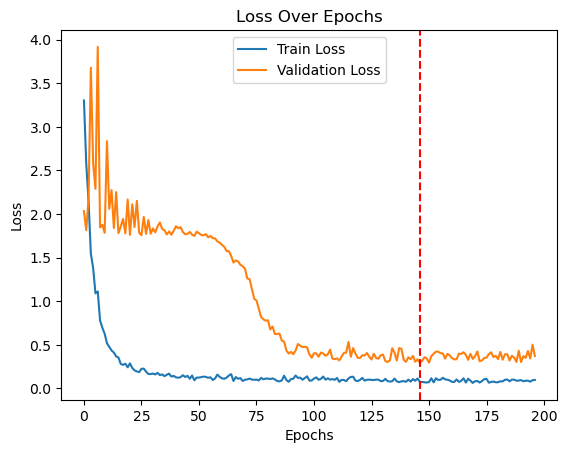

In [ ]:
# Visualization of the loss of the training and validation set
import matplotlib.pyplot as plt
plt.plot(my_history.history['loss'], label='Train Loss')
plt.plot(my_history.history['val_loss'], label='Validation Loss')
min_val_loss = min(my_history.history['val_loss'])
plt.axvline(x=my_history.history['val_loss'].index(min_val_loss), color='red', linestyle='--')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


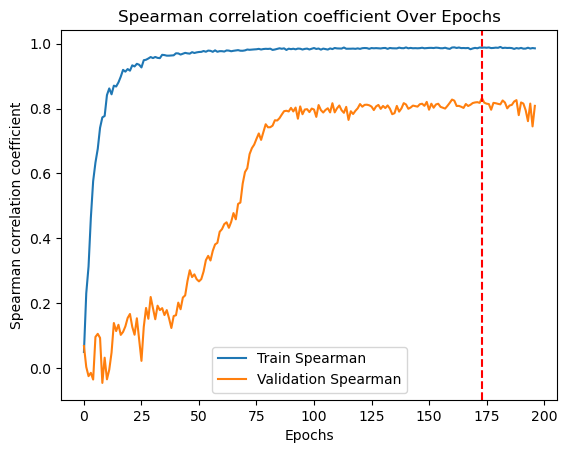

In [ ]:
# Visualization of the spearman correlation coefficient of the training and validation set
import matplotlib.pyplot as plt
plt.plot(my_history.history['tf_Spearman'], label='Train Spearman')
plt.plot(my_history.history['val_tf_Spearman'], label='Validation Spearman')
max_val_tf_Spearman = max(my_history.history['val_tf_Spearman'])
plt.axvline(x=my_history.history['val_tf_Spearman'].index(max_val_tf_Spearman), color='red', linestyle='--')
plt.title('Spearman correlation coefficient Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Spearman correlation coefficient')
plt.legend()
plt.show()


# Save the model and weights

In [ ]:
model_name="DeepPScan"
model_json = my_model.to_json()
with open('RBP_m6A_preference_CNN_model_' + model_name + '.json', "w") as json_file:
    json_file.write(model_json)
my_model.save_weights('RBP_m6A_preference_CNN_model_' + model_name + '.h5')
